In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")

In [2]:
#path_to_file = './datasets/GlobalDataset2017.csv'
Orig_Global = pd.read_csv("./Datasets/GlobalDataset2017.csv")
Global = pd.read_csv("./Datasets/GlobalDataset2017.csv")

In [3]:
#Global1.loc[Global1['citizenship'] == "TH"]
#Global = Global1[Global1["citizenship"].str.match('TH')]

In [4]:
obj_df = Global.select_dtypes(include=['object']).copy()
obj_df.head()

,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,Case Management,Female,18--20,Adult,Adult,Adult,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,MD,Unknown,MD
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ


In [5]:
cleanup_nums = {"gender":     {"Female": 0, "Male": 1, "Unknown": 2},
                "majorityStatus": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "majorityStatusAtExploit": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "majorityEntry": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "Datasource": {"Case Management": 0, "Hotline": 1},
                "RecruiterRelationship":{
                    "Unknown": 3,
                    "-99": 3,
                    "Other": 3,
                    "Friend": 2,
                    "Family/Relative": 0,
                    "Intimate Partner": 1,
                    "Family/Relative; Intimate Partner": 0,
                    "Friend; Other": 2,
                    "Friend; Intimate Partner": 1,
                    "Family/Relative; Friend": 0,
                    "Family/Relative; Unknown": 0,
                    "Intimate Partner; Other": 1,
                    "Family/Relative; Other": 0,
                    "Family/Relative; Friend; Other": 0,
                    "Friend; Intimate Partner; Other": 1,
                    "Intimate Partner; Unknown": 1,
                    "Friend; Unknown": 2
                }
               }

In [6]:
cleanup_citizen = {"citizenship": {"PH": 1,
"ZZ": 0,
"MD": 2,
"UA": 2,
"US": 0,
"ID": 1,
"BY": 2,
"MM": 1,
"KH": 1,
"RO": 2,
"GH": 0,
"KG": 1,
"BG": 2,
"HT": 0,
"UZ": 1,
"AF": 1,
"-99": 6,
"MX": 0,
"GW": 0,
"TH": 1,
"LA": 1,
"CO": 0,
"NG": 0,
"CN": 1,
"LK": 1,
"TJ": 1,
"UG": 0,
"SN": 0,
"KZ": 1,
"SL": 0,
"CD": 0,
"AL": 2,
"ML": 0,
"BF": 0,
"NE": 0,
"CI": 0,
"NP": 1,
"TM": 1,
"BO": 1,
"VN": 1,
"GN": 0,
"ER": 0,
"KR": 1,
"BD": 1,}         
                }

In [7]:
cleanup_exploit =  {"CountryOfExploitation": {"-99": 6,
"US": 5,
"MD": 2,
"UA": 2,
"RU": 2,
"PH": 1,
"ID": 1,
"MY": 1,
"GH": 0,
"AE": 1,
"TH": 1,
"BY": 2,
"SN": 0,
"BG": 2,
"PL": 2,
"HT": 0,
"RO": 2,
"TR": 1,
"SA": 1,
"KZ": 1,
"QA": 1,
"Y1": 1,
"KW": 1,
"MK": 2,
"UZ": 1,
"BA": 2,
"UG": 0,
"JP": 1,
"JO": 1,
"ZZ": 0,
"OM": 1,
"TJ": 1,
"TT": 0,
"AF": 1,
"LB": 1,
"SL": 0,
"KH": 1,
"CZ": 2,
"CN": 1,
"AL": 2,
"SY": 1,
"SG": 1,
"ZA": 0,
"TW": 1,
"IT": 2,
"TM": 1,
"AT": 2,
"BH": 1,
"MU": 0,
"AR": 0,
"DK": 2,
"EG": 0,
"EC": 0,
"CY": 1}
               }

In [8]:
obj_df.replace(cleanup_nums, inplace=True)

In [9]:
obj_df.replace(cleanup_citizen, inplace=True)

In [10]:
obj_df.replace(cleanup_exploit, inplace=True)

In [11]:
obj_df.drop('ageBroad', axis=1, inplace=True)
obj_df.dtypes


Datasource                 int64
gender                     int64
majorityStatus             int64
majorityStatusAtExploit    int64
majorityEntry              int64
citizenship                int64
RecruiterRelationship      int64
CountryOfExploitation      int64
dtype: object

In [12]:
#BEFORE REPLACING: Check the columns and their values...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']].head()


,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,Case Management,Female,Adult,Adult,Adult,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,MD,Unknown,MD
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ


In [13]:
#REPLACE...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']]=obj_df[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']]

#AFTER REPLACING: Check the columns and their values...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']].head()


,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,0,0,0,0,0,1,3,1
NaN,0,0,0,3,3,1,3,1
NaN,0,0,0,3,3,2,3,2
NaN,0,0,0,3,3,1,3,1
NaN,0,0,0,3,3,1,3,1


In [14]:
Global.drop('ageBroad', axis=1, inplace=True)
Global.drop('yearOfRegistration', axis=1, inplace=True)
Global.drop('meansOfControlNotSpecified', axis=1, inplace=True)

In [15]:
Global.replace(to_replace=-99, value=0, inplace=True, axis=0)

/Users/sjohnston/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3786: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


In [16]:
(Global == -99).sum()

Datasource                                0
gender                                    0
majorityStatus                            0
majorityStatusAtExploit                   0
majorityEntry                             0
citizenship                               0
meansOfControlDebtBondage                 0
meansOfControlTakesEarnings               0
meansOfControlRestrictsFinancialAccess    0
meansOfControlThreats                     0
meansOfControlPsychologicalAbuse          0
meansOfControlPhysicalAbuse               0
meansOfControlSexualAbuse                 0
meansOfControlFalsePromises               0
meansOfControlPsychoactiveSubstances      0
meansOfControlRestrictsMovement           0
meansOfControlRestrictsMedicalCare        0
meansOfControlExcessiveWorkingHours       0
meansOfControlUsesChildren                0
meansOfControlThreatOfLawEnforcement      0
meansOfControlWithholdsNecessities        0
meansOfControlWithholdsDocuments          0
meansOfControlOther             

In [17]:
Global.dtypes

Datasource                                int64
gender                                    int64
majorityStatus                            int64
majorityStatusAtExploit                   int64
majorityEntry                             int64
citizenship                               int64
meansOfControlDebtBondage                 int64
meansOfControlTakesEarnings               int64
meansOfControlRestrictsFinancialAccess    int64
meansOfControlThreats                     int64
meansOfControlPsychologicalAbuse          int64
meansOfControlPhysicalAbuse               int64
meansOfControlSexualAbuse                 int64
meansOfControlFalsePromises               int64
meansOfControlPsychoactiveSubstances      int64
meansOfControlRestrictsMovement           int64
meansOfControlRestrictsMedicalCare        int64
meansOfControlExcessiveWorkingHours       int64
meansOfControlUsesChildren                int64
meansOfControlThreatOfLawEnforcement      int64
meansOfControlWithholdsNecessities      

In [18]:
X = Global

In [19]:
km3 = KMeans(n_clusters=3)

#Fit model on data
km3.fit(X)

#Get the labels

labels = km3.labels_

labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [20]:
km3.predict(Global)

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [21]:
pd.value_counts(labels)

0    24696
2    12939
1     9467
dtype: int64

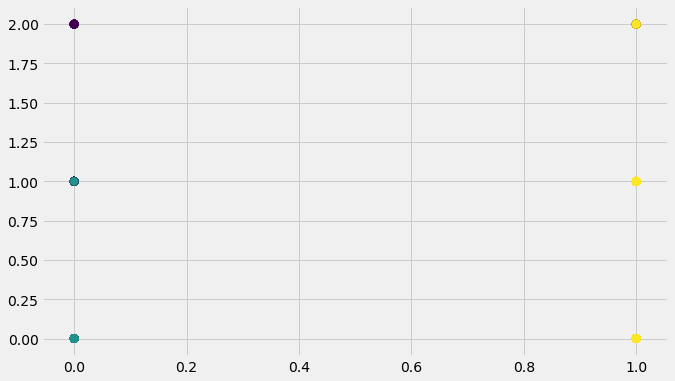

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=68, c=labels);

In [23]:
from sklearn.decomposition import TruncatedSVD

In [24]:
trun = TruncatedSVD(n_components=2)

Xt = trun.fit_transform(X.values)

In [25]:
Xt

array([[ 2.32021507, -0.56825783],
       [ 4.71526289, -2.53855971],
       [ 5.54644028, -2.09467134],
       ...,
       [ 8.36832664,  1.44694182],
       [ 8.33442099,  1.5071466 ],
       [ 8.41012684,  1.47298302]])

In [26]:
#Centriod values
centriods = km3.cluster_centers_


In [27]:
km3 = KMeans(n_clusters=3)

#Fit model on data
km3.fit(Xt)

#Get the labels

labels = km3.labels_

labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [28]:
pd.value_counts(labels)

1    24696
0    11488
2    10918
dtype: int64

In [29]:
#Centriod values
centriods = km3.cluster_centers_


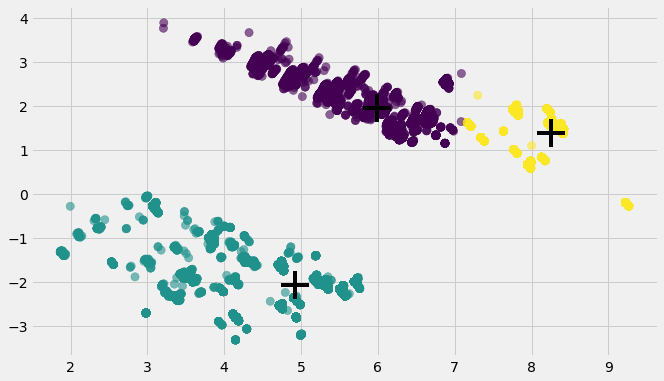

In [30]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels, alpha= .6)
plt.scatter(centriods[ : , 0], centriods[ : , 1], s = 800, marker="+", c = "black")
plt.show()

In [31]:
#Intialize the KMeans algorithm with 4 clusters

km4 = KMeans(n_clusters=4)

#Fit model on data
km4.fit(Xt)

#Get the labels

labels = km4.labels_

labels

array([0, 2, 2, ..., 3, 3, 3], dtype=int32)

In [32]:
#The counts of labels
pd.value_counts(labels)

2    17548
1    11488
3    10918
0     7148
dtype: int64

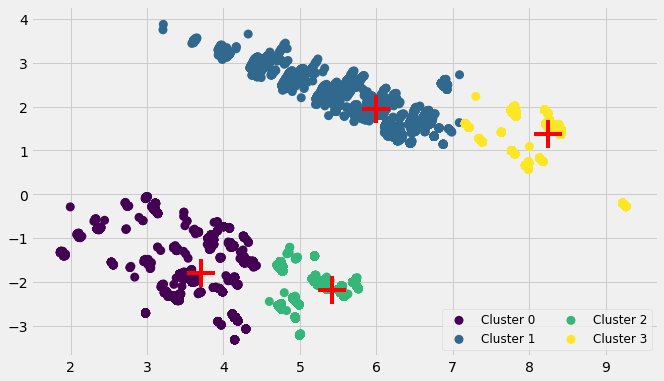

In [33]:
# NEW FROM STEPHEN:
#
# Attribution: Reworked code on link below to show legend for my clusters scatter plot...
# https://stackoverflow.com/questions/44595288/matplotlib-adding-legend-based-on-existing-color-series

# Adapt my data: put the coordinates (Xt) and the cluster identifier (Labels) into the same DataFrame...
df_plotting = pd.DataFrame(zip(Xt[:,0], Xt[:,1], labels))
df_plotting.columns = ['x', 'y', 'colors']
df_plotting.head()

# Temp code to examine/convert content...
#np.unique(labels)
#df['colors'] = df['colors'].fillna(0.0).astype(int)

plt.figure(figsize=(10,6))

# -------- Adapted code --------
size=81
cmap = plt.cm.viridis
norm = plt.Normalize(df_plotting['colors'].values.min(), df_plotting['colors'].values.max())

for i, dff in df_plotting.groupby("colors"):
    plt.scatter(dff['x'], dff['y'], s=size, c=cmap(norm(i)), edgecolors='none', label="Cluster {:g}".format(i))
# -----------------------------

#Centriod values
cents4 = km4.cluster_centers_
plt.scatter(cents4[ : , 0], cents4[ : , 1], s = 800, marker="+", c = "red")
    
plt.legend(scatterpoints=1, loc='lower right', ncol=2, fontsize=12)
plt.show()

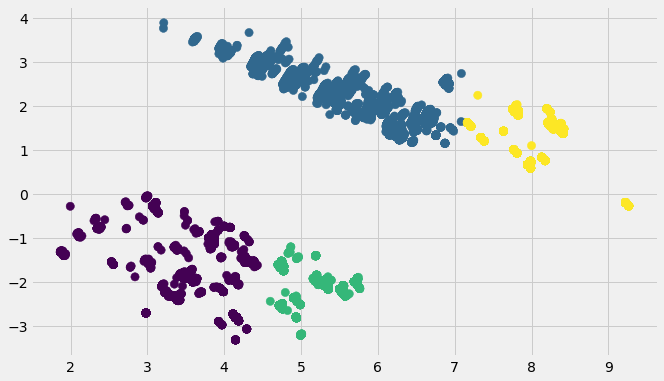

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels)
plt.show()

In [35]:
#Centriod values
cents4 = km4.cluster_centers_

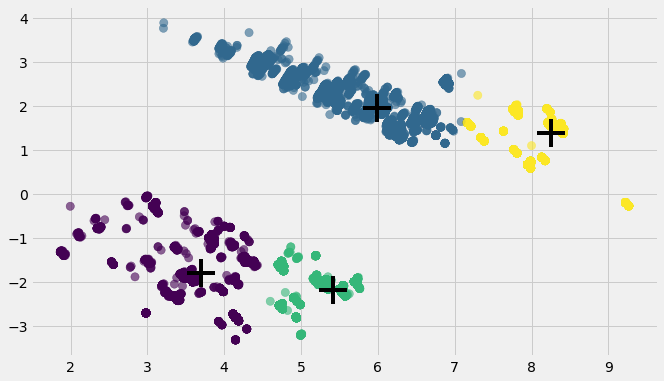

In [36]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels, alpha= .6)
plt.scatter(cents4[ : , 0], cents4[ : , 1], s = 800, marker="+", c = "black")
plt.show()

In [37]:
#silhouette_score(Xt, labels)

In [38]:
#km3.inertia_

In [39]:
#km4.inertia_

#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xt)
    labels = model.labels_
    score = silhouette_score(Xt, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");


cluster_range = range(2, 17)
#Intialize list to store inertia scores

i_scores = []

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xt)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

In [40]:
data = X.copy()

data["labels"] = labels

In [41]:
data.shape

(47102, 56)

In [42]:
data.groupby("labels").mean()

,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,...,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
labels,,,,,,,,,,,,,,,,,,,,,
0,0.013151,0.567851,0.378567,2.599189,0.767068,1.035395,0.083660,0.197118,0.000000,0.155288,...,0.0,0.000000,0.000000,2.818411,1.041410,0.000140,0.011752,0.056519,0.247202,0.684387
1,0.932974,0.089572,0.631616,1.588353,1.918872,0.092444,0.032904,0.072859,0.010446,0.137709,...,0.0,0.000958,0.005571,2.537866,5.067026,0.098886,0.030554,0.080519,0.023068,0.740164
2,0.000000,0.309380,0.576419,2.993390,2.997835,1.784933,0.000114,0.000171,0.000000,0.001425,...,0.0,0.000000,0.000000,2.974185,1.742079,0.000000,0.025815,0.000000,0.024447,0.949738
3,0.000000,0.273860,2.476552,3.000000,2.944129,1.215332,0.002381,0.000000,0.000000,0.000824,...,0.0,0.000000,0.000000,2.953288,6.000000,0.000092,0.046529,0.000000,0.106705,0.846675


In [43]:
#data.groupby("labels").mean().iloc[0].plot(kind="bar", figsize = (14, 7))

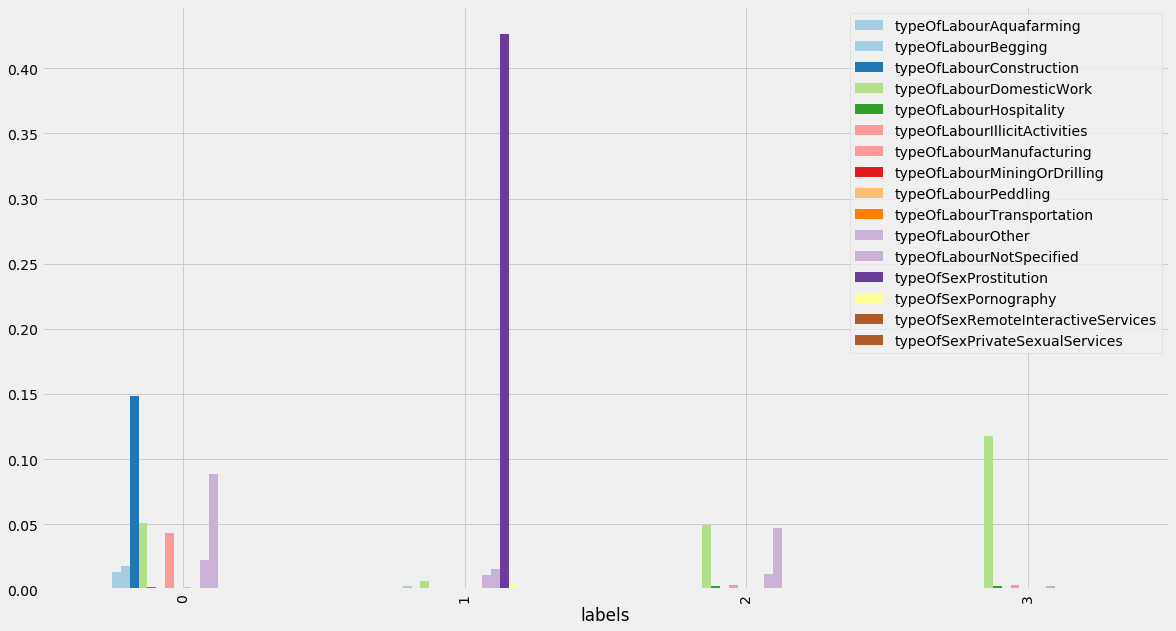

In [44]:
data.groupby("labels").mean().iloc[:,31:47].plot(kind="bar",colormap='Paired',figsize = (18, 10))

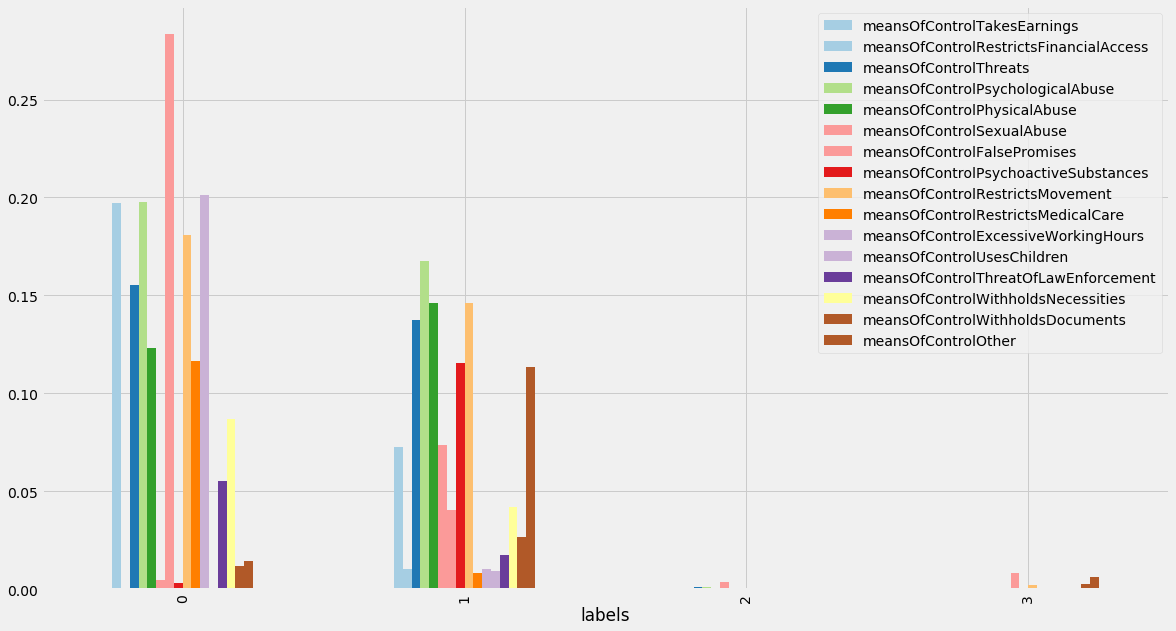

In [45]:
col_list=range(7,23) # Set the list of columns to plot for each cluster label
data.groupby("labels").mean().iloc[:,col_list].plot(kind="bar",colormap='Paired', figsize = (18, 10))

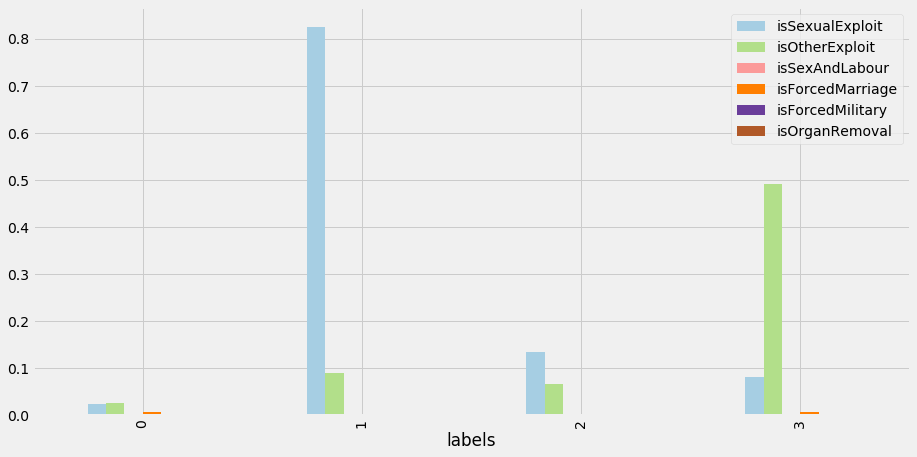

In [46]:
data.groupby("labels").mean().iloc[:,24:30].plot(kind="bar", colormap='Paired', figsize = (14, 7))

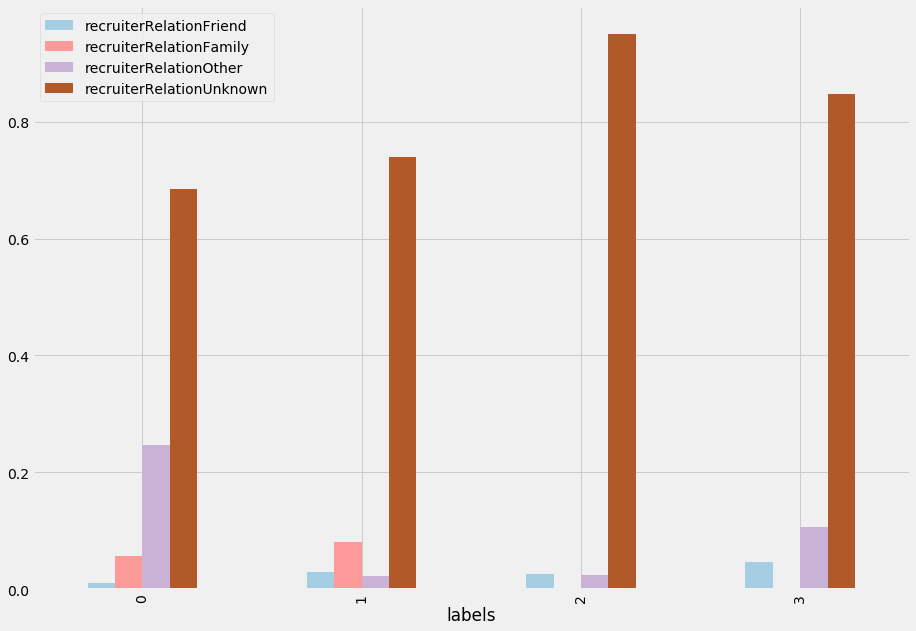

In [47]:
data.groupby("labels").mean().iloc[:,51:55].plot(kind="bar", colormap='Paired',figsize = (14, 10))

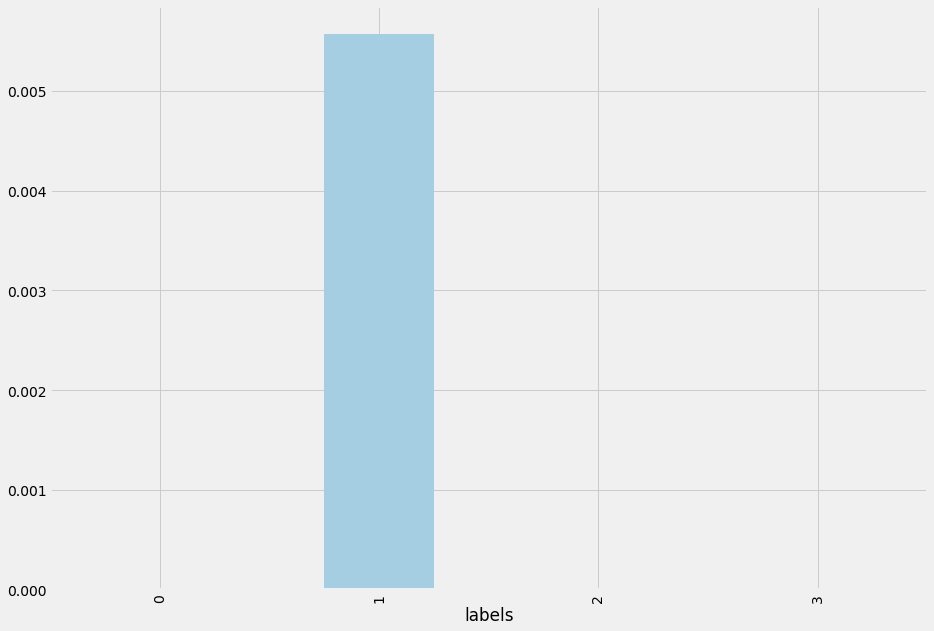

In [48]:
data.groupby("labels").mean().iloc[:,47].plot(kind="bar", colormap='Paired',figsize = (14, 10))

In [49]:
data.groupby("labels").mean().T

labels,0,1,2,3
Datasource,0.013151,0.932974,0.000000,0.000000
gender,0.567851,0.089572,0.309380,0.273860
majorityStatus,0.378567,0.631616,0.576419,2.476552
majorityStatusAtExploit,2.599189,1.588353,2.993390,3.000000
majorityEntry,0.767068,1.918872,2.997835,2.944129
citizenship,1.035395,0.092444,1.784933,1.215332
meansOfControlDebtBondage,0.083660,0.032904,0.000114,0.002381
meansOfControlTakesEarnings,0.197118,0.072859,0.000171,0.000000
meansOfControlRestrictsFinancialAccess,0.000000,0.010446,0.000000,0.000000
meansOfControlThreats,0.155288,0.137709,0.001425,0.000824


In [50]:
df_labels = pd.DataFrame()
df_labels['labels'] = labels
df_labels.head()

,labels
0,0
1,2
2,2
3,2
4,2


In [51]:
Orig_Global['labels'] = labels

In [52]:
Orig_Global.reset_index()

,index,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,labels
0,NaN,2010,Case Management,Female,18--20,Adult,Adult,Adult,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,0
1,NaN,2011,Case Management,Female,18--20,Adult,-99,-99,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,2
2,NaN,2004,Case Management,Female,18--20,Adult,-99,-99,MD,-99,...,-99,0,Unknown,MD,0,0,0,0,1,2
3,NaN,2011,Case Management,Female,18--20,Adult,-99,-99,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,2
4,NaN,2011,Case Management,Female,18--20,Adult,-99,-99,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,2
5,NaN,2011,Case Management,Female,21--23,Adult,-99,-99,KZ,-99,...,-99,-99,Unknown,KZ,0,0,0,0,1,2
6,NaN,2010,Case Management,Female,18--20,Adult,Adult,Adult,KZ,1,...,-99,-99,Unknown,KZ,0,0,0,0,1,0
7,NaN,2002,Case Management,Female,24--26,Adult,-99,-99,MD,-99,...,-99,0,Unknown,Y1,0,0,0,0,1,2
8,NaN,2002,Case Management,Female,24--26,Adult,-99,-99,MD,-99,...,-99,0,Unknown,Y1,0,0,0,0,1,2
9,NaN,2002,Case Management,Female,24--26,Adult,-99,-99,MD,-99,...,-99,0,Unknown,Y1,0,0,0,0,1,2


In [53]:
#Using .groupby, create a grouped dataframe where Global dataset is grouped by "Pclass".
Group = Orig_Global .groupby(labels)

In [54]:
type(Group)

pandas.core.groupby.DataFrameGroupBy

In [55]:
class_counts =Orig_Global.groupby('labels').size()

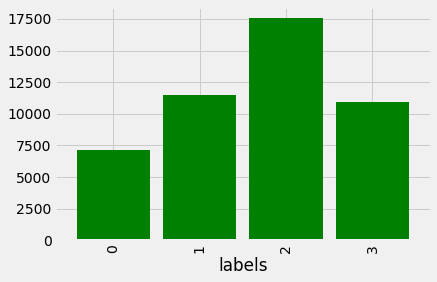

In [56]:
class_counts.plot(kind="bar", color="g", width=0.85)

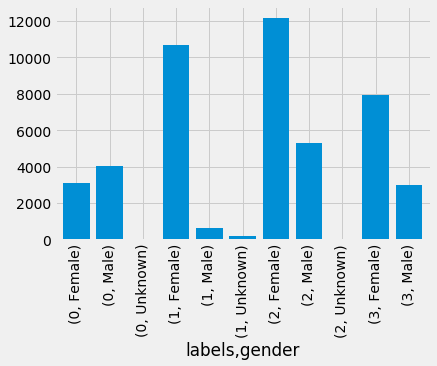

In [57]:
Orig_Global.groupby(['labels','gender'])['gender'].count().plot(kind='bar',stacked = True, width=0.8)

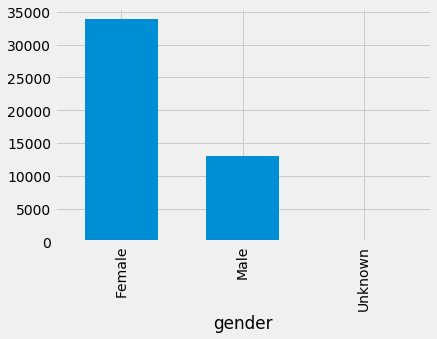

In [58]:
Orig_Global.groupby(['gender'])['gender'].count().plot(kind='bar',stacked = True, width=0.6)

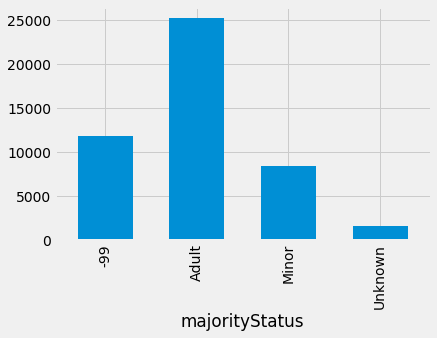

In [59]:
Orig_Global.groupby(['majorityStatus'])['majorityStatus'].count().plot(kind='bar',stacked = True, width=0.6)

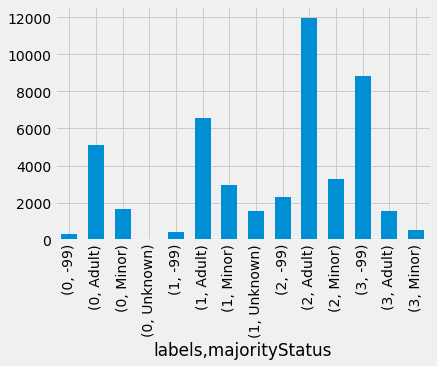

In [60]:
Orig_Global.groupby(['labels','majorityStatus'])['majorityStatus'].count().plot(kind='bar',stacked = True, width=0.6)

In [61]:
Cgender = Orig_Global.groupby(['labels','gender'])['gender'].count()
Cgender.unstack()

gender,Female,Male,Unknown
labels,,,
0,3101.0,4035.0,12.0
1,10644.0,659.0,185.0
2,12177.0,5313.0,58.0
3,7928.0,2990.0,NaN


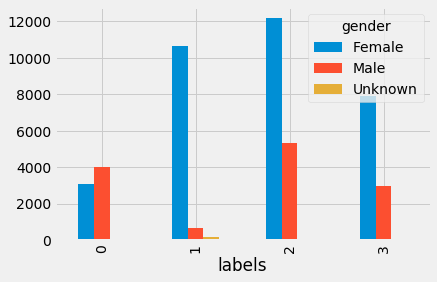

In [62]:
Cgender.unstack().plot(kind='bar')

Cage = Orig_Global.groupby(['ageBroad'])['ageBroad'].count()
Cage=Cage['ageBroad'!='-99']

Cage

Orig_Global.groupby(['ageBroad'])['ageBroad'].count()

In [63]:
#Orig_Global.groupby(['citizenship']).size().reset_index(name='count')


In [64]:
Citizen=Orig_Global.groupby(['labels', 'citizenship']).size().reset_index(name='count')
Citizen

,labels,citizenship,count
0,0,AF,98
1,0,BF,33
2,0,BO,18
3,0,BY,263
4,0,CD,53
5,0,CI,31
6,0,CO,13
7,0,ER,13
8,0,GH,545
9,0,GN,15


In [65]:
Country_Exploit =Orig_Global.groupby(['CountryOfExploitation']).size().reset_index(name='count')


In [66]:
df_citizenship=Orig_Global.groupby(['citizenship']).size().reset_index(name='count')

df_citizenship=df_citizenship[df_citizenship.citizenship!='-99']
df_citizenship=df_citizenship[df_citizenship.citizenship!='ZZ']

df_citizenship['lat']= np.nan
df_citizenship['long']= np.nan

df_citizenship

,citizenship,count,lat,long
1,AF,239,NaN,NaN
2,AL,45,NaN,NaN
3,BD,11,NaN,NaN
4,BF,33,NaN,NaN
5,BG,342,NaN,NaN
6,BO,18,NaN,NaN
7,BY,1513,NaN,NaN
8,CD,53,NaN,NaN
9,CI,31,NaN,NaN
10,CN,94,NaN,NaN


In [67]:
!pip install folium
!pip install geopy

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [68]:
import folium
import json

In [69]:
# Reading the JSON data using json.load()
# Source; https://gist.github.com/sindresorhus/1341699#file-countrycode-latlong-json
file = './Datasets/countrycode-latlong.json'
with open(file) as latlong_file:
    dict_latlong = json.load(latlong_file)

#dict_latlong

for index, row in df_citizenship.iterrows():
    #print row['citizenship'], row['count'], row['lat'], row['long']
    key = (row['citizenship']).lower()
    if key in dict_latlong:
        #print dict_latlong[key]
        df_citizenship.set_value(index,'lat',dict_latlong[key]['lat'])
        df_citizenship.set_value(index,'long',dict_latlong[key]['long'])
        
df_citizenship


,citizenship,count,lat,long
1,AF,239,33.0,65.0000
2,AL,45,41.0,20.0000
3,BD,11,24.0,90.0000
4,BF,33,13.0,-2.0000
5,BG,342,43.0,25.0000
6,BO,18,-17.0,-65.0000
7,BY,1513,53.0,28.0000
8,CD,53,0.0,25.0000
9,CI,31,8.0,-5.0000
10,CN,94,35.0,105.0000


In [70]:
# Get the first latitude and longitude coordinates
latitude = df_citizenship.at[1,'lat']
longitude = df_citizenship.at[1,'long']

# Generate Folium map from the first location to use as a base to append the other country location counts...
world_countries = folium.Map(location=[latitude, longitude], tiles="Mapbox Bright", zoom_start=1.9)

# Add the location markers one by one on the map...
for index, row in df_citizenship.iterrows():
    latitude = row['lat']
    longitude = row['long']
    popup_str = "%s: %s" % (str(row['citizenship']), str(row['count']))

    folium.Marker([latitude, longitude],
        popup=popup_str,
        icon=folium.Icon(color='crimson')).add_to(world_countries)

world_countries.save('incident_volume_markers_by_citizen.html')
world_countries

In [71]:
# Get the first latitude and longitude coordinates
latitude = df_citizenship.at[1,'lat']
longitude = df_citizenship.at[1,'long']

# Generate Folium map from the first location to use as a base to append the other country location counts...
world_countries = folium.Map(location=[latitude, longitude], tiles="Mapbox Bright", zoom_start=1.8)

# Add the location markers one by one on the map...
for index, row in df_citizenship.iterrows():
    latitude = row['lat']
    longitude = row['long']
    popup_str = "%s: %s" % (str(row['citizenship']), str(row['count']))
    
    folium.Circle(
        location=[latitude, longitude],
        popup=popup_str,
        radius=row['count']*200,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(world_countries)

world_countries.save('incident_volume_heatmap_by_citizen.html')
world_countries

In [72]:
df_country=Orig_Global.groupby(['CountryOfExploitation']).size().reset_index(name='count')

df_country=df_country[df_country.CountryOfExploitation!='-99']
df_country=df_country[df_country.CountryOfExploitation!='ZZ']
df_country=df_country[df_country.CountryOfExploitation!='Y1']

df_country['lat']= np.nan
df_country['long']= np.nan

df_country

,CountryOfExploitation,count,lat,long
1,AE,515,NaN,NaN
2,AF,84,NaN,NaN
3,AL,45,NaN,NaN
4,AR,18,NaN,NaN
5,AT,24,NaN,NaN
6,BA,127,NaN,NaN
7,BG,356,NaN,NaN
8,BH,22,NaN,NaN
9,BY,393,NaN,NaN
10,CN,52,NaN,NaN


In [73]:
# Reading the JSON data using json.load()
# Source; https://gist.github.com/sindresorhus/1341699#file-countrycode-latlong-json
file = './Datasets/countrycode-latlong.json'
with open(file) as latlong_file:
    dict_latlong = json.load(latlong_file)

#dict_latlong

for index, row in df_country.iterrows():
    #print row['citizenship'], row['count'], row['lat'], row['long']
    key = (row['CountryOfExploitation']).lower()
    if key in dict_latlong:
        #print dict_latlong[key]
        df_country.set_value(index,'lat',dict_latlong[key]['lat'])
        df_country.set_value(index,'long',dict_latlong[key]['long'])
        
df_country

,CountryOfExploitation,count,lat,long
1,AE,515,24.0000,54.0000
2,AF,84,33.0000,65.0000
3,AL,45,41.0000,20.0000
4,AR,18,-34.0000,-64.0000
5,AT,24,47.3333,13.3333
6,BA,127,44.0000,18.0000
7,BG,356,43.0000,25.0000
8,BH,22,26.0000,50.5500
9,BY,393,53.0000,28.0000
10,CN,52,35.0000,105.0000


In [74]:
# Get the first latitude and longitude coordinates
latitude = df_country.at[1,'lat']
longitude = df_country.at[1,'long']

# Generate Folium map from the first location to use as a base to append the other country location counts...
world_countries = folium.Map(location=[latitude, longitude], tiles="Mapbox Bright", zoom_start=1.9)

# Add the location markers one by one on the map...
for index, row in df_country.iterrows():
    latitude = row['lat']
    longitude = row['long']
    popup_str = "%s: %s" % (str(row['CountryOfExploitation']), str(row['count']))

    folium.Marker([latitude, longitude],
        popup=popup_str,
        icon=folium.Icon(color='crimson')).add_to(world_countries)

world_countries.save('incident_volume_markers_by_country.html')
world_countries

In [75]:
# Get the first latitude and longitude coordinates
latitude = df_country.at[1,'lat']
longitude = df_country.at[1,'long']

# Generate Folium map from the first location to use as a base to append the other country location counts...
world_countries = folium.Map(location=[latitude, longitude], tiles="Mapbox Bright", zoom_start=1.8)

# Add the location markers one by one on the map...
for index, row in df_country.iterrows():
    latitude = row['lat']
    longitude = row['long']
    popup_str = "%s: %s" % (str(row['CountryOfExploitation']), str(row['count']))
    
    folium.Circle(
        location=[latitude, longitude],
        popup=popup_str,
        radius=row['count']*200,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(world_countries)

world_countries.save('incident_volume_heatmap_by_country.html')
world_countries